In [18]:
import os
from skimage import data
from skimage.io import imsave, imread, imshow
from skimage.color import rgba2rgb, rgb2grey
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np

In [38]:

ORIGINAL = "./originals/100x100_1.png"
TRAIN_PATH = "./p20/train/"
TEST_PATH = "./p20/test/"

SAMPLE_IMAGE = "./p20/train/images/0.png"
SAMPLE_LABEL = "./p20/train/labels/0.png"
SAMPLE_ANOTATION = "./p20/train/anotations/0.png"
SAMPLE_TEST = "./sample_test.png"


In [39]:

def split_image(image_path, save_path, splited_dimensions):
    image = imread(image_path)
    nrows, ncols, nchanls = image.shape
    M, N = splited_dimensions
    tiles = [image[x:x+M, y:y+N]
             for x in range(0, image.shape[0], M) for y in range(0, image.shape[1], N)]
    for i in range(64):
        imsave(save_path+str(i)+".png", tiles[i])



In [72]:
def invert(image):
    newImg = 255 * (image[:, :] == 0) + (0 * (image[:,:]==255))
    return newImg

def anotation2label(image_name, image_path, label_path):
    image = imread(image_path+image_name)
    image = invert(255 * (image[:, :, 1] > 0))
    imsave(label_path+image_name, image)
    
def createLabels(anotation_path, label_path):
    a = os.listdir(anotation_path)
    for img in a:
        anotation2label(img, anotation_path, label_path)

In [47]:
def img2BW(image_name, image_path, new_image_path):
    image = imread(image_path+image_name)
    image = image[:, :, 2]
    imsave(new_image_path+image_name, image)

def createBWImages(image_path, new_image_path):
    a = os.listdir(image_path)
    for img in a:
        img2BW(img, image_path, new_image_path)

In [50]:
def img2Label(image_path):
    image = imread(image_path)
    image = image[:, :, 2]
    image = filters.sobel(image)
    image = 255 * (image[:, :] < 0.12)
    imsave(TRAIN_PATH+"sample_test.png", image)

In [51]:
createBWImages(TRAIN_PATH+"images/", TRAIN_PATH+"bwImages/")

/home/caio/Apps/miniconda3/envs/unet/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ./p20/train/bwImages/19.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/caio/Apps/miniconda3/envs/unet/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ./p20/train/bwImages/9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


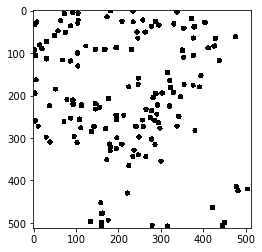

In [71]:
createLabels(TRAIN_PATH+"")